<a href="https://colab.research.google.com/github/ROHII123/Multiple-linear-regrression/blob/main/Clustering_Airlines_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
airline = pd.read_csv("/content/EastWestAirlines.csv")

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airline.iloc[:,1:])

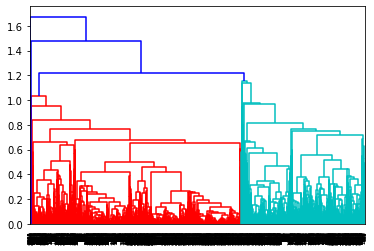

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [12]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [13]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [14]:
y_hc = hc.fit_predict(df_norm)

In [15]:
y_hc

array([1, 1, 1, ..., 0, 1, 1])

In [16]:
airline['hc_clusterid'] = hc.labels_

In [17]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


**K_Means**

In [18]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [19]:
airline1= pd.read_csv("/content/EastWestAirlines.csv")

In [20]:
airline1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [21]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline1_df = scaler.fit_transform(airline1.iloc[:,1:])

In [22]:
#How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

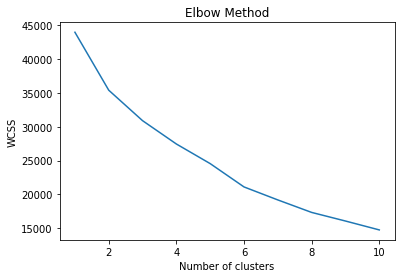

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airline1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [26]:
x=pd.Series(model.labels_)
airline1['Clust']=x

In [27]:
airline1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [28]:
airline1.iloc[:,1:5].groupby(airline1.Clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles
Clust,,,,
0,83529.153046,290.453195,1.156018,1.032689
1,40747.617290,92.345809,1.092778,1.017923
2,118032.061192,73.112721,3.576490,1.001610
3,108317.387376,198.336634,3.915842,1.001238


**DBSCAN**

In [29]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [30]:
airline2=pd.read_csv("/content/EastWestAirlines.csv")

In [31]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [32]:
df=airline2.iloc[:,1:5]

In [35]:
df.values

array([[28143,     0,     1,     1],
       [19244,     0,     1,     1],
       [41354,     0,     1,     1],
       ...,
       [73597,     0,     3,     1],
       [54899,     0,     1,     1],
       [ 3016,     0,     1,     1]])

In [36]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [39]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01,
        -9.82418871e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02]])

In [40]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [41]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [43]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [44]:
pd.concat([airline2,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
